In [10]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 400)

In [11]:
# aux_functions

def calculate_inflation(df):
    # Initialize the 'YoY' column with None values
    df['YoY'] = None

    for index, row in df.iterrows():
        if index > 0:  # Ensure there are at least 12 months of data
            # Calculate the Year-over-Year (YoY) inflation rate
            df.at[index, 'YoY'] = round((row.iloc[2] / df.iloc[index - 12, 2] - 1)*100,2)  # Use the value 12 months ago
            
    df['MoM'] = None
    
    for index, row in df.iterrows():
        if index > 1:  # Ensure there are at least 12 months of data
            # Calculate the Year-over-Year (YoY) inflation rate
            df.at[index, 'MoM'] = round((row.iloc[2] / df.iloc[index - 1, 2] - 1)*100,2)
            
    df = df.iloc[12:].reset_index(drop=True)
            
    return df


# Convert from wide to long format
def wide_to_long(df_wide, varNameLong, idVar, varValueLong):
    # Convert from wide to long format, excluding HALF1 and HALF2 columns
    list_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df_long = pd.melt(df_wide, id_vars=[idVar], 
                      value_vars=list_months,
                      var_name=varNameLong, value_name=varValueLong)
    
        # Sort the DataFrame by Year and Month
    df_long[varNameLong] = pd.Categorical(df_long[varNameLong], categories=list_months, ordered=True)
    df_long_sorted = df_long.sort_values(by=[idVar, varNameLong]).reset_index(drop=True)
    
    return df_long_sorted

# Import Data
def import_data(raw_data_path, substring):
    """
    Imports an .xlsx file from the specified raw data path that contains a given substring in its filename.

    Parameters:
    - raw_data_path (str): Directory path where the .xlsx files are stored.
    - substring (str): Substring to search for in file names.

    Returns:
    - DataFrame: The loaded data as a pandas DataFrame, or None if no file is found.
    """
    try:
        # Search for a file containing the substring
        for file_name in os.listdir(raw_data_path):
            if substring in file_name and file_name.endswith('.xlsx'):
                file_path = os.path.join(raw_data_path, file_name)
                data = pd.read_excel(file_path, skiprows=11)
                print(f"Data from '{file_name}' imported successfully.")
                
                data = wide_to_long(data, "Month", "Year","Index")
                
                return data

        print(f"No file containing '{substring}' found in the specified path.")
        return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    


In [12]:
# Settings

# raw_folder
raw_data_path = "../data/raw/"

# Files
all_items_code = "172704_f33c3d"
food_beverage_code = "172750_b3e106"
energy_code = "183110_8d312a"
housing_code = "183112_230cf2"
apparel_code = "183114_65f59b"
recreation_code = "183116_7c0a26"
education_code = "183118_dc51a8"
communication_code = "183121_9d9b2d"
medicalcare_code = "183123_878802"
transportation_code = "183125_ba0883"

In [13]:
# Define the CPI components dictionary with string keys
cpi_components = {
    'all_items': all_items_code,
    'food_beverage': food_beverage_code,
    'energy': energy_code,
    'housing': housing_code,
    'apparel': apparel_code,
    'recreation': recreation_code,
    'education': education_code,
    'communication': communication_code,
    'transportation': transportation_code
}

# Initialize an empty dictionary to store the resulting DataFrames
cpi_dataset = {}

# Iterate over the dictionary to process each CPI component
for key, code in cpi_components.items():
    # Step 1: Import data (assuming `import_data` function exists and works as intended)
    dataset = import_data(raw_data_path, code)
    
    # Step 2: Calculate inflation (assuming `calculate_inflation` function works as intended)
    dataset = calculate_inflation(dataset)
    
    # Step 3: Save the DataFrame in the dictionary with the key
    cpi_dataset[key] = dataset  # Save the DataFrame directly as a value


# Now dataset_list contains all the dictionaries

/Users/victorarduinwecki/anaconda3/envs/datascience/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/victorarduinwecki/anaconda3/envs/datascience/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/victorarduinwecki/anaconda3/envs/datascience/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/victorarduinwecki/anaconda3/envs/datascience/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains n

Data from 'SeriesReport-20241113172704_f33c3d.xlsx' imported successfully.
Data from 'SeriesReport-20241113172750_b3e106.xlsx' imported successfully.
Data from 'SeriesReport-20241113183110_8d312a.xlsx' imported successfully.
Data from 'SeriesReport-20241113183112_230cf2.xlsx' imported successfully.
Data from 'SeriesReport-20241113183114_65f59b.xlsx' imported successfully.
Data from 'SeriesReport-20241113183116_7c0a26.xlsx' imported successfully.
Data from 'SeriesReport-20241113183118_dc51a8.xlsx' imported successfully.
Data from 'SeriesReport-20241113183121_9d9b2d.xlsx' imported successfully.
Data from 'SeriesReport-20241113183125_ba0883.xlsx' imported successfully.


/Users/victorarduinwecki/anaconda3/envs/datascience/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
# Getting First Charts
#// precisa ajustar coluna data

# Initialize an empty dictionary to hold the extracted index columns
index_columns = {}

# Loop through each key-value pair in cpi_dataset
for key, dataset in cpi_dataset.items():
    # Extract the 'index' column from the DataFrame
    index_column = dataset['YoY']  # Assuming 'index' is the name of the column
    # Store the 'index' column in the dictionary with the key name
    index_columns[key] = index_column

# Create a new DataFrame from the index_columns dictionary
inflation_dataset = pd.DataFrame(index_columns)

# Generate a date range starting from '2015-01-01' with a frequency of one month
date_range = pd.date_range(start='2015-01-01', periods=len(inflation_dataset), freq='M')

# Add the date range as a new column to the DataFrame
inflation_dataset['Date'] = date_range

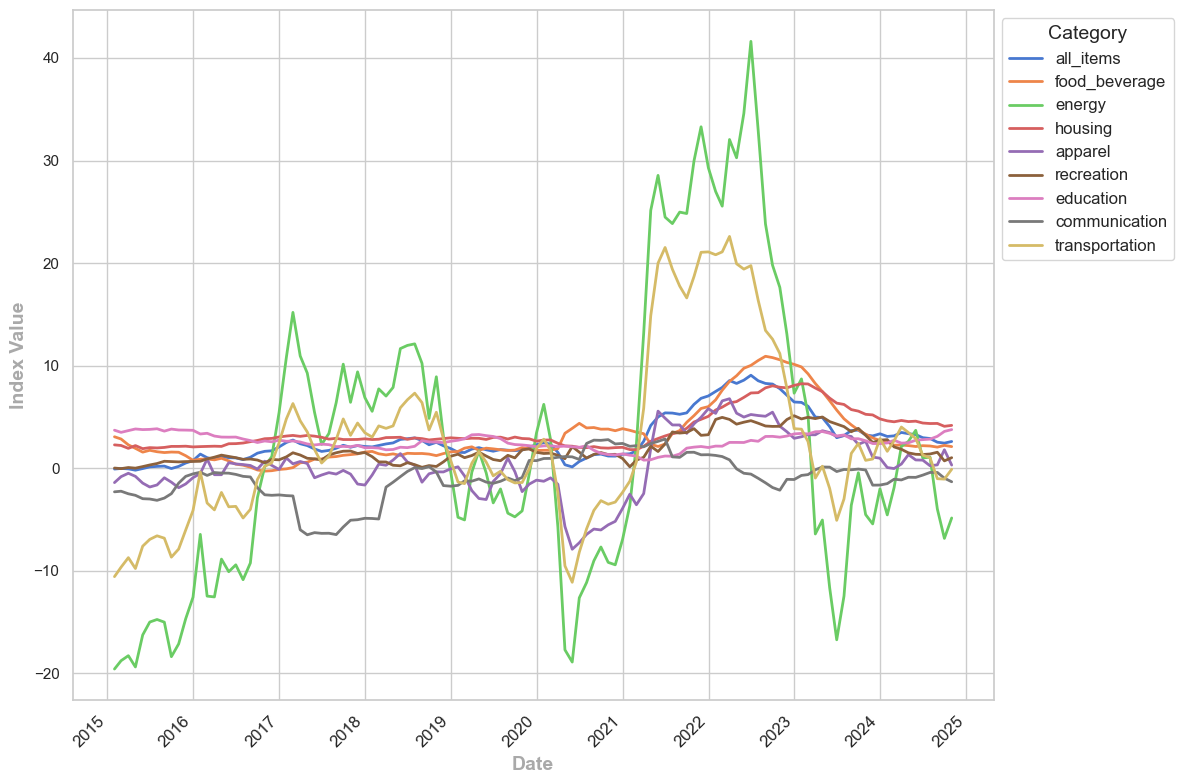

In [15]:
def plot_index_trends(df):
    """
    Plots the index trends for each category in the DataFrame against the 'Date' column.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data with a 'Date' column.
    """
    # Set a stylish Seaborn theme for a more modern and clean look
    sns.set_theme(style="whitegrid", palette="muted")
    
    # Plotting
    plt.figure(figsize=(12, 8))  # Increase figure size for better readability

    # Loop through each category and plot its values with custom styles
    for column in df.columns[:-1]:  # Exclude the 'Date' column
        plt.plot(df['Date'], df[column], label=column, linewidth=2, markersize=6)

    # Adding title with a more modern font style
    plt.title("", fontsize=18, fontweight='bold', color='darkblue')

    # Adding axis labels with larger font size
    plt.xlabel("Date", fontsize=14, fontweight='bold', color='darkgray')
    plt.ylabel("Index Value", fontsize=14, fontweight='bold', color='darkgray')

    # Rotate x-axis labels for better visibility and formatting
    plt.xticks(rotation=45, ha="right", fontsize=12)

    # Display a more customized legend with improved spacing
    plt.legend(title='Category', title_fontsize=14, fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

    # Adjust layout to ensure the legend and labels fit
    plt.tight_layout()

    # Show plot
    plt.show()

plot_index_trends(inflation_dataset)